<a href="https://colab.research.google.com/github/pallavrouth/MarketingAnalytics/blob/main/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EA sports A/B Tests

https://medium.com/@shabidzh/the-power-of-a-b-testing-the-solution-for-eas-video-game-simcity-5-82ceb418a76d


Questions -

1. What is the scientific basis of making such comparisons?
2. What is the process of implementing such a test?

# Why do we need to infer?

Inference plays a crucial role in statistical analysis because it allows us to draw meaningful conclusions and make informed decisions based on a limited amount of data. When we conduct experiments or surveys, it is often impractical or impossible to study an entire population, which may be too large or too costly to investigate comprehensively. Instead, we work with samples—smaller subsets of the population.

Inference enables us to extrapolate our findings from these samples to make statements about the entire population. This is vital in various fields, including science, business, and social sciences, where we aim to generalize our observations and identify patterns, trends, or differences.

For example, in a medical study, researchers may test a new drug's effectiveness on a sample of patients and then use inference to determine whether the drug is likely to have the same effect on the broader population. Without inference, we would be limited to drawing conclusions only about the individuals in the study, which wouldn't provide insights into the drug's broader potential impact.

To appreciate the significance of inference, it's essential to understand the distinction between a sample and a population:

**Population:** The population refers to the entire group that you want to study or draw conclusions about. This could be all the people in a country, all the products manufactured by a company, or any other extensive group of interest. In practice, it's often impractical to gather data from an entire population.

**Sample:** A sample is a subset of the population—a smaller group that we collect data from. The goal is for the sample to be representative of the population, allowing us to make valid inferences about the broader group based on the sample's characteristics and outcomes. A well-chosen and representative sample is a critical component of accurate statistical inference.

# What do you need to make an inference?

**Hypothesis:** A hypothesis is a statement or assumption about the population that we intend to test. It defines what we expect to find or what we want to investigate.

**Sample:** As discussed earlier, the sample is a subset of the population from which data is collected. The sample should be selected using a well-defined and often random method to ensure it is representative of the population.

**A Statistical Test:** To conduct inference, we use a statistical test or method that helps us assess whether the data from our sample provides enough evidence to either accept or reject the null hypothesis. Common statistical tests include t-tests, chi-square tests, ANOVA, and regression analysis, among others. The choice of the test depends on the type of data and the research question.


## Promotions testing

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

In [30]:
import pandas as pd

In [ ]:
fast_food = pd.read_csv('https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/abtest.csv')
fast_food.head()

In [32]:
fast_food.LocationID.unique()
fast_food.Promotion.unique()

array([3, 2, 1])

### Case 1: Testing one sample

You are an expert and you know mean sales in promos from markets of small size is $50.

Hypothesis: mean sales from promotions done in medium sized markets is \$50. However, in the sample the mean from promotion sales from a medium sized sample is different -

In [33]:
medium_store_sales = fast_food.loc[lambda d: d.MarketSize == "Medium","SalesInThousands"]
medium_store_sales.mean()

43.985343750000006

The sample mean of 43 different from your prior belief of 50. So the question is - is this different of 7 meaningfully different? In this case, hypothesis testing will help you determine if sample statistic of 43 is different from expected value of 50.

Before we move on, we need to clearly state our hypothesis. In hypothesis testing, we typically have two hypotheses: a null hypothesis ($\text{H}_0$) that represents the status quo or no effect and an alternative hypothesis ($\text{H}_A$) that represents the effect or difference we are testing.

We start by assuming the null hypothesis is true. We need to have *sufficient evidence* to either reject the null hypothesis or say that the null hypothesis is true.

The sufficiency of evidence in hypothesis testing is provided by a **statistical test**. Different types of hypothesis and different types of variables calls for the use of different types statistcal tests.

In this case, we will use a **one sample t test**. Why one sample? Simply because we have one-sample which is a sample of sales numbers. Sales numbers don't vary by group.

This test involves calculating a *t-value* which also called *t-statistic*. The formula for calculating the t-statistic is given by

$t = \frac{{\bar{x} - \mu}}{{\frac{s}{\sqrt{n}}}}$

where
1. $\bar{x}$: This represents the sample mean, which is the average of the sample data.
2. $\mu$: This represents the population mean, which is the mean of the entire population being studied.
3. $s$: This represents the sample standard deviation, which measures the variability or dispersion of the sample data.
4. $n$: This represents the sample size, or the number of observations in the sample.




In [34]:
medium_store_sales = fast_food.loc[lambda d: d.MarketSize == "Medium","SalesInThousands"].to_list()
null_hypothesis_mean = 50
n = len(medium_store_sales)
sample_mean = sum(medium_store_sales) / n
sample_variance = sum((x - sample_mean) ** 2 for x in medium_store_sales) / (n - 1)
sample_std_dev = sample_variance ** 0.5

t_statistic = (sample_mean - null_hypothesis_mean) / (sample_std_dev / (n ** 0.5))
degrees_of_freedom = n - 1

The task is, then to then calculate a **p-value** associated with this t-value. One can calculate this manually by looking at a t-distribution table. But, we can also calculate this using python.

In [35]:
alpha = 0.05

from scipy.stats import t
p_value = 2 * (1 - t.cdf(abs(t_statistic), df=degrees_of_freedom))
print("p-value:", p_value)

p-value: 0.0



The p-value helps us quantify the strength of evidence in support null hypothesis. That is, it helps us understand the probability of null hypothesis being true.

If p value is low sufficient evidence to reject the null hypothesis. If p value is high, strong evidence in support of h0 (fail to reject null).

But, what defines when p value is high enough? This cut off point is known as the **significance level**. The most common choice is a p-value of 5% or 0.05.

If p values is less than 5%, H0 is rejected. If p-value is higher than 5% we don't have sufficient evidence to reject the null hypothesis.

In [36]:
if p_value < alpha:
    print("Reject the null hypothesis")
    print(f"The mean sales are statistically different from the given mean.")
else:
    print("Fail to reject the null hypothesis")
    print(f"The mean sales are not statistically different from the given mean.")

Reject the null hypothesis
The mean sales are statistically different from the given mean.


In [37]:
import scipy.stats as stats


given_mean = 50
sales_data = fast_food.loc[lambda d: d.MarketSize == "Medium","SalesInThousands"]
t_stat, p_value = stats.ttest_1samp(sales_data, given_mean)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
    print(f"The mean sales are statistically different from the given mean.")
else:
    print("Fail to reject the null hypothesis")
    print(f"The mean sales are not statistically different from the given mean.")


Reject the null hypothesis
The mean sales are statistically different from the given mean.


### Comparing 2 samples or groups: A/B Testing

So far we have seen how to word and test hypothesis related to a singular sample. That is, the elements in sample does not vary based on pre defined groups in any way.

However, most samples have grouping. In our example, the sales generated can vary based on the type of promotions. In other words, the sales can be grouped based on promos.

Given this type of sample, a common hypothesis is testing whether a measured variable varies across groups. This is a common question used in a very common marketing analytics tool called **A/B testing**.

In this example, an important A/B test could be see whether average sales is different from promotion 1 or 2. The result could be used to learn the effectiveness of promotions

It is important to note that just because there is a visible difference, it does not mean that the difference is statistically meaningful.

So, the wording of hypothesis for comparing 2 (or more) groups is slightly different from one sample. Suppose we want to test whether average sales generated from promo 2 is higher than the sales generated from promo 1.

This can be framed as:

1. $\text{H}_0$: average sales from promo 2 = average sales from promo 1. Using mathematical notations, $\text{H}_0$: $\mu_{2} = \mu_{1}$ or $\mu_{2} - \mu_{1} = 0$
2. $\text{H}_A$: average sales from promo 2 is different average sales from promo 1. Using mathematical notations, $\text{H}_A$: $\mu_{2} \neq \mu_{1}$ or $\mu_{2} - \mu_{1} \neq 0$;

To test this hypothesis we use a two sample t-test.

In [38]:
fast_food_simple = fast_food.loc[lambda d: d.Promotion.isin([1,2])]
fast_food_simple.Promotion.unique()

array([2, 1])

Hypothesis: promo 2 better than promo 1 maybe because of how the promotion was created. Maybe it is social media based promotion.

In [39]:
promo_a_sales = fast_food.loc[lambda d: d.Promotion == 1,"SalesInThousands"]
promo_b_sales = fast_food.loc[lambda d: d.Promotion == 2,"SalesInThousands"]
t_stat, p_value = stats.ttest_ind(promo_a_sales, promo_b_sales, equal_var = False)
alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis")
    print("Mean sales from Promo B significantly different from mean sales from Promo A")
else:
    print("Fail to reject the null hypothesis")
    print("Mean sales from Promo B equal to from mean sales from Promo A")

Reject the null hypothesis
Mean sales from Promo B significantly different from mean sales from Promo A


The alternate hypothesis can be framed as one promotion being better than another.

1. $\text{H}_0$: average sales from promo 2 = average sales from promo 1. Using mathematical notations, $\text{H}_0$: $\mu_{2} = \mu_{1}$ or $\mu_{2} - \mu_{1} = 0$
2. $\text{H}_A$: average sales from promo 2 is different average sales from promo 1. Using mathematical notations, $\text{H}_A$: $\mu_{2} > \mu_{1}$ or $\mu_{2} - \mu_{1} > 0$;

In [40]:
t_stat, p_value = stats.ttest_ind(promo_b_sales, promo_a_sales, equal_var=False, alternative = 'greater')
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
    print(f"Mean sales from promo B significantly higher than mean sales from promo A")
else:
    print("Fail to reject the null hypothesis")
    print(f"Mean sales from promo B equal to mean sales from promo A")

Fail to reject the null hypothesis
Mean sales from promo B equal to mean sales from promo A


How about comparing all three promotions. We use something called an ANOVA.

**ANOVA, or Analysis of Variance**, is a statistical test used to compare the means of three or more groups or categories to see if there are any significant differences among them. It's like comparing the average performance of different groups to determine if there's a noteworthy distinction between them.

1. The null hypothesis in ANOVA suggests that there is no significant difference among the group means. In other words, it assumes that all groups have the same average or performance. ANOVA aims to test whether this null hypothesis is likely or not.

2. The alternative hypothesis, on the other hand, suggests that at least one of the groups has a different mean compared to the others. It implies that there's a significant difference somewhere among the groups.

Think of ANOVA as a way to determine if the variations between the group means are more than what you might expect due to random chance. If the variations are significantly larger, then the null hypothesis can be rejected, indicating that there is a real difference among the groups. If the variations are not significant, you'll fail to reject the null hypothesis, and it suggests that the groups are similar in terms of the parameter you're measuring.

In [41]:
promo_a_sales = fast_food.loc[lambda d: d.Promotion == 1,"SalesInThousands"]
promo_b_sales = fast_food.loc[lambda d: d.Promotion == 2,"SalesInThousands"]
promo_c_sales = fast_food.loc[lambda d: d.Promotion == 3,"SalesInThousands"]


f_statistic, p_value = stats.f_oneway(promo_a_sales, promo_b_sales, promo_c_sales)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference among the mean sales from promotions A, B, and C.")
else:
    print("Fail to reject the null hypothesis: No significant difference among the mean sales from promotions A, B, and C.")


Reject the null hypothesis: There is a significant difference among the mean sales from promotions A, B, and C.


# Linear regression

Linear regression takes the concept of hypothesis testing further by allowing us to test hypotheses about the relationships between multiple variables. In traditional hypothesis testing, we can only test hypotheses about the relationship between two variables at a time.

## How does linear regression work and how it helps us.

Representing the relationship between two or more variables by "fitting" a straight line. The straight line capttures how these two variable are varying.

The main aim is to discover the perfect straight line, called a "regression line," that acts like the best summary of the relationship between variables. This line is created in a way that it minimizes the total squared differences between the actual data points and where the line predicts those points should be. In other words, it's like finding the line that hugs the data points closely, making it a useful tool for understanding how changes in one variable relate to changes in another.

## How is linear regression used for marketing analytics

- **Demand based marketing mix models:** Linear regression can be employed to build demand models and marketing mix models. These models help marketers understand the impact of various marketing activities, such as advertising, pricing, promotions, and product features, on sales or demand for a product or service. By analyzing historical data, marketers can use regression analysis to quantify the relationship between these marketing variables and sales. This enables them to optimize marketing strategies, allocate budgets more effectively, and make data-driven decisions about which marketing activities yield the best results.

- **Explaining consumer behavior**: Linear regression can be used to explain and predict consumer behavior. Marketers often collect data on various consumer characteristics (e.g., demographics, income, age) and their interactions with marketing efforts (e.g., website visits, email responses, purchase history). By applying regression analysis, marketers can identify which of these factors have a significant influence on consumer behavior. This knowledge can be used to create more targeted and personalized marketing campaigns, tailor product offerings to specific segments, and enhance customer experiences.

## Demand based marketing mix models: Simple and Multiple Linear regression

We will study simple and multiple linear regression models in the context of developing demand based marketing mix models. Specifically, we will study how company investments in various advertising channels impacts sales. Here sales represents a type of demand from the market and advertising expenditure in various channel represent an important marketing mix strategic variable.


Here is a scatter plot between sales and TV ad budget. The way the dots are arranged indicates that as budget increases, so does sales. The line through the middle is the best fit line which captures how sales varies with budget.



In [2]:
sales_data = (
    pd.read_csv('https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/marketingmix.csv', index_col = 'Unnamed: 0')
      .rename(columns = {'TV Ad Budget ($)':'tv_ad', 'Radio Ad Budget ($)':'radio_ad',
                         'Newspaper Ad Budget ($)': 'news_ad', 'Sales ($)':'sales'})
)


sales_data.head()

,tv_ad,radio_ad,news_ad,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
from plotnine import (
    ggplot,
    aes,
    geom_point,
    geom_boxplot,
    geom_smooth,
    facet_wrap
)

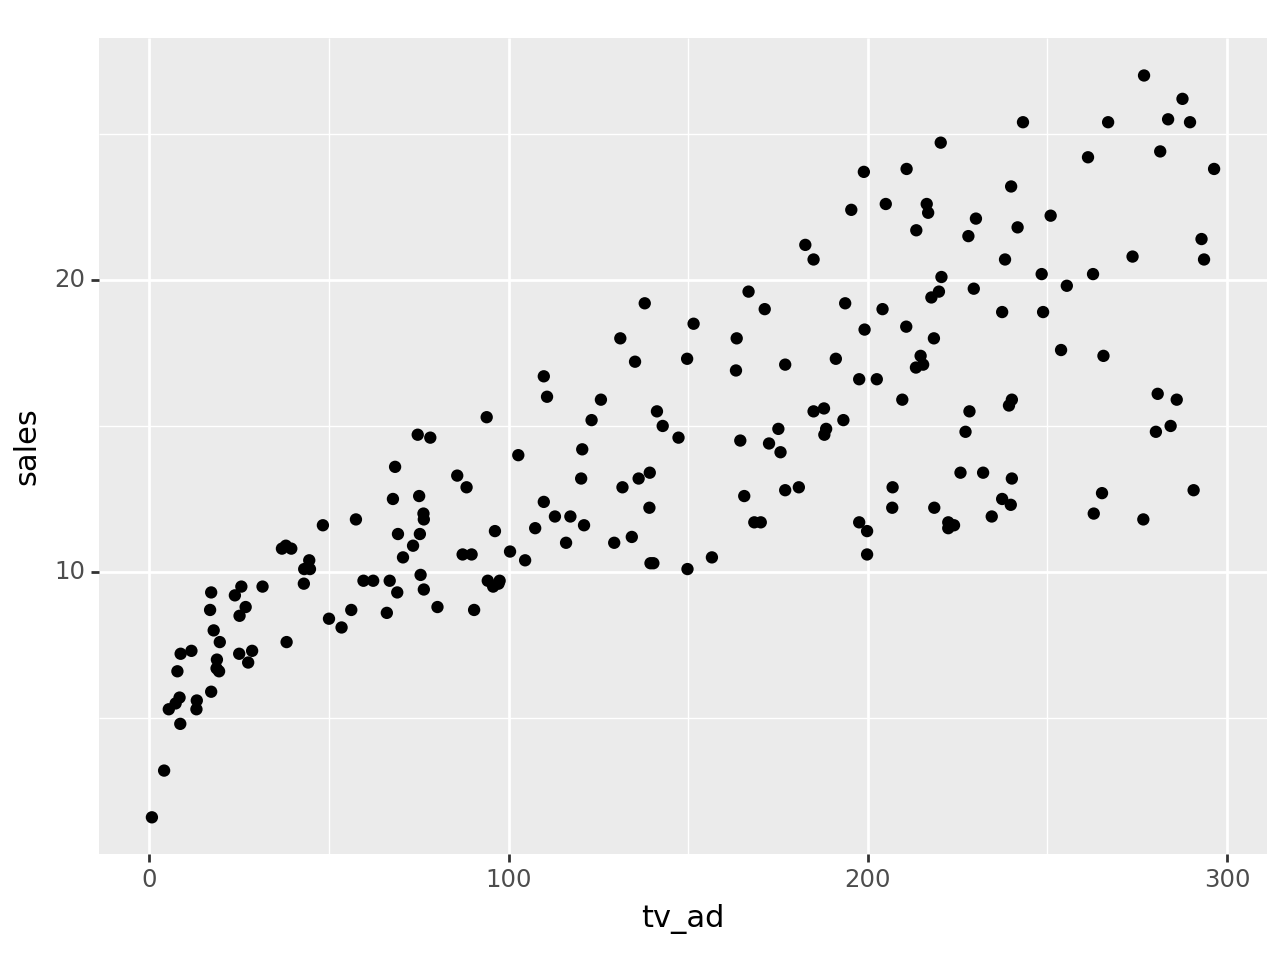

<Figure Size: (640 x 480)>

In [5]:
(
    ggplot(sales_data, aes(x = 'tv_ad', y = 'sales'))
      + geom_point()
)

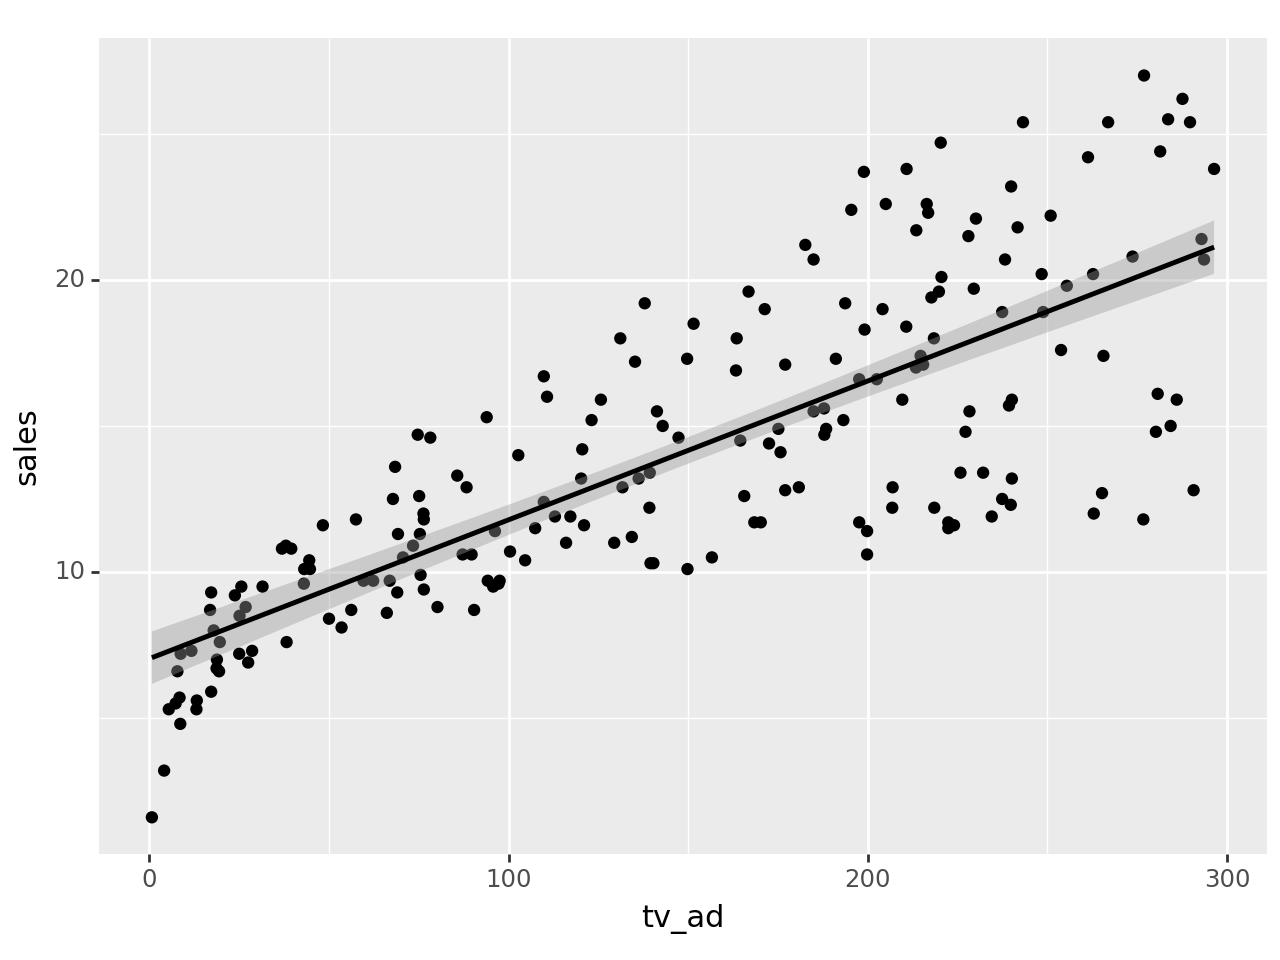

<Figure Size: (640 x 480)>

In [6]:
(
    ggplot(sales_data, aes(x = 'tv_ad', y = 'sales'))
      + geom_point()
      + geom_smooth(method = "lm")
)

In regression terms you say you are attempting to understand the impact or influence of budget on sales. In other words you want to explain the variation in sales using the variation in budget. Here budget is an explanatory variable or independent variable or feature variable and sales is the dependent variable, outcome variable or response variable.

Mathematically, this line gives us two important pieces of information that helps us better understand the nature of the relationship and use it to make predictions.

First, we have the "intercept." Think of this as the starting point, where our line crosses the vertical axis. It tells us what the value of our dependent variable is when the independent variable is zero. In practical terms, it's like figuring out the baseline or the initial condition.

Second, there's the "slope." This is how steep or shallow our line is. It reveals how much the dependent variable changes when the independent variable moves by one unit. It's like understanding the rate or degree of change in our relationship – whether it's a strong, steep climb or a gentle, gradual incline.

## Using python

You can **estimate** the slope and intercept in python using the `statsmodel` api.

In [7]:
from statsmodels.formula.api import ols

regression_model = ols(formula = 'sales ~ tv_ad',
                       data = sales_data).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.47e-42
Time:                        19:24:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

#### Intepreting coefficients

The **magnitude of coefficient**, measures the change in the dependent variable (y-axis) associated with a one-unit change in the independent variable (x-axis).

The **sign of the slope** (+ or -) indicates the direction of the relationship: a positive slope suggests a positive correlation (as the independent variable increases, the dependent variable also increases), while a negative slope suggests a negative correlation (as the independent variable increases, the dependent variable decreases).

The **significance of the coefficient** assess if this impact is statistically valid. If a coefficient is significant, it means there is evidence to suggest that the variable it represents has a real influence on the outcome. If it's not significant, it might just be noise, and we can't rely on it for making predictions or decisions.

To determine significance, we often look at p-values associated with each coefficient. A low p-value (typically below 0.05) suggests that the coefficient is statistically significant. In other words, it's unlikely that the relationship we see is purely coincidental. On the other hand, a high p-value indicates that the relationship might not be meaningful.

Here the null hypothesis is that coefficient is zero. Therefore, by rejecting this null hypothesis you are saying that the coefficient is not zero and equal to the value in the table.

In the above regression -

1. The intercept represents the estimated value of the dependent variable when the independent variable (in this case, 'tv_ad') is zero. In this context, it suggests that when there is zero TV advertising expenditure ('tv_ad'), average sales is 7.0326. The low p-value (0.000) indicates that the intercept is statistically significant.

2. The coefficient for 'tv_ad' (0.0475) represents the estimated change in the dependent variable for a one-unit increase in the 'tv_ad' variable. In this case, **for every additional unit of TV advertising expenditure**, sales is expected to increase by 0.0475 units **on average**. The very low p-value (0.000) suggests that 'tv_ad' is statistically significant in predicting sales.

#### Other key considerations

- **overall F value**: The overall F-value in regression analysis helps us assess the model's significance as a whole. It checks if, collectively, the independent variables have an impact on the dependent variable.

If the F-value is significant, it means that at least one of the independent variables is influential in explaining the variation in the dependent variable. It gives us confidence in the overall model's usefulness.

- **R squared**: R-squared is a measure of how well the independent variables explain the variation in the dependent variable. It tells us what percentage of the total variability in the dependent variable is accounted for by our model.

A higher R-squared indicates that the model does a better job of explaining the variation. However, a high R-squared doesn't necessarily mean the model is good, as it can be overfitted. Therefore, it should be considered in conjunction with other factors.


### Simple to multiple regression

Now as you can see in the dataset, the company does not invest only in one channel. For example, radio and newspaper ad budget is another important factor that can impact sales. When we plot sales from every channel we do see a strong relationship between sales and radio ads.


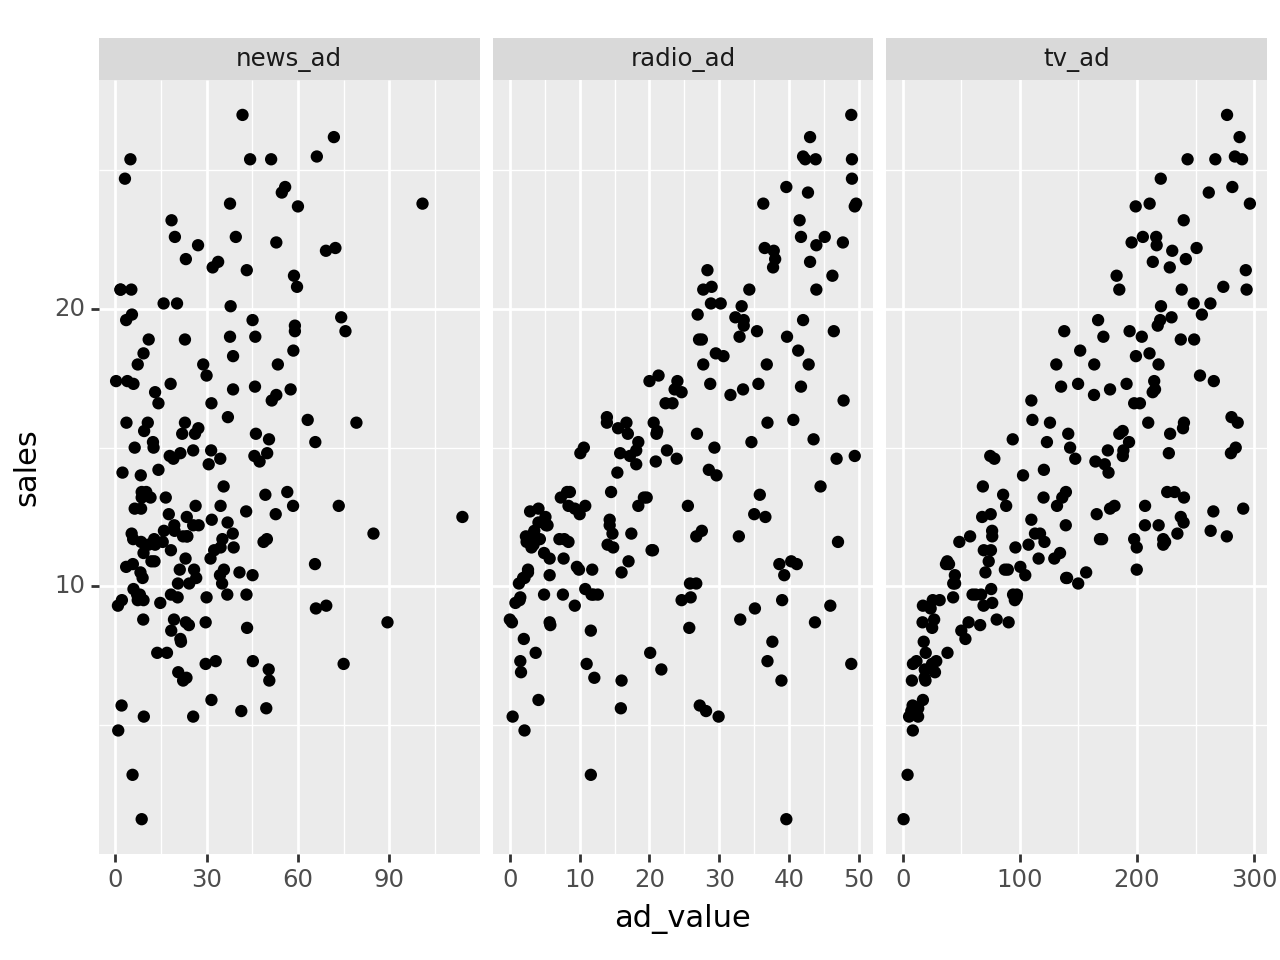

<Figure Size: (640 x 480)>

In [8]:
plot_data = (
    sales_data.melt(id_vars= 'sales',var_name='ad_type', value_name='ad_value')
)

(
    ggplot(plot_data, aes(x = 'ad_value', y = 'sales'))
      + geom_point()
      + facet_wrap('ad_type', scales = 'free_x')
)

If you don't include radio and newspaper ad budget information, then you may be overexplaining the variation of sales due to tv budget. These additional variables are called **control variables**. They serve the purpose of isolating and measuring the relationship between the independent variable(s) of interest and the dependent variable while holding other potential influencing factors at a desired level.

Let's re estimate this model by adding education and see how the coefficient of experience is changing.

In [9]:
from statsmodels.formula.api import ols

regression_model = ols(formula = 'sales ~ tv_ad + radio_ad + news_ad',
                       data = sales_data).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        19:25:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Notice that inclusion of radio ad and new ad, reduced the coefficient of tv_ad from 0.047 to 0.045. How do we interpret the coefficients when we add control variables?

1. For every additional unit of TV advertising expenditure ('tv_ad'), the estimated value of sales is expected to increase by 0.0458 units on average **holding all other variables constant**.

2. For every additional unit of radio advertising expenditure ('radio_ad'), the estimated value of sales is expected to increase by 0.1885 units on average **holding all other variables constant**.

### Explaining customer behavior: Interpreting dummy variables

We will study how companies also use SLR and MLR to explain behavior at the consumer level. In general, for companies, it's crucial to understand how their decisions and policies affect customer behavior. In this example, we will study consumer satisfaction levels as an indication of their behavior. Specifically, we will look at an airline satisfaction rating.

Using this context, we will study how to interpret categorical variables in a regression equation. Categorical variables are often called dummy variables.



In [11]:
csat_data = pd.read_csv('https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/csat.csv')
csat_data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [12]:
from pandas.core.algorithms import value_counts
import numpy as np
csat_data_subset = (
    csat_data.loc[:,["Customer Type","Age","Gender","Type of Travel","Class","On-board service"]]
    .rename(columns = {"Customer Type":"loyalty","Gender":'gender',"Age":"age",
             "Type of Travel":'travel_type',"Class":'travel_class',
             "On-board service": 'service_rating'})
    .assign(loyalty_dummy = lambda d: np.where(d.loyalty == "Loyal Customer",1,0),
            male_dummy = lambda d: np.where(d.gender == "Male",1,0))
)

csat_data_subset.head()
csat_data_subset.travel_class.value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: travel_class, dtype: int64

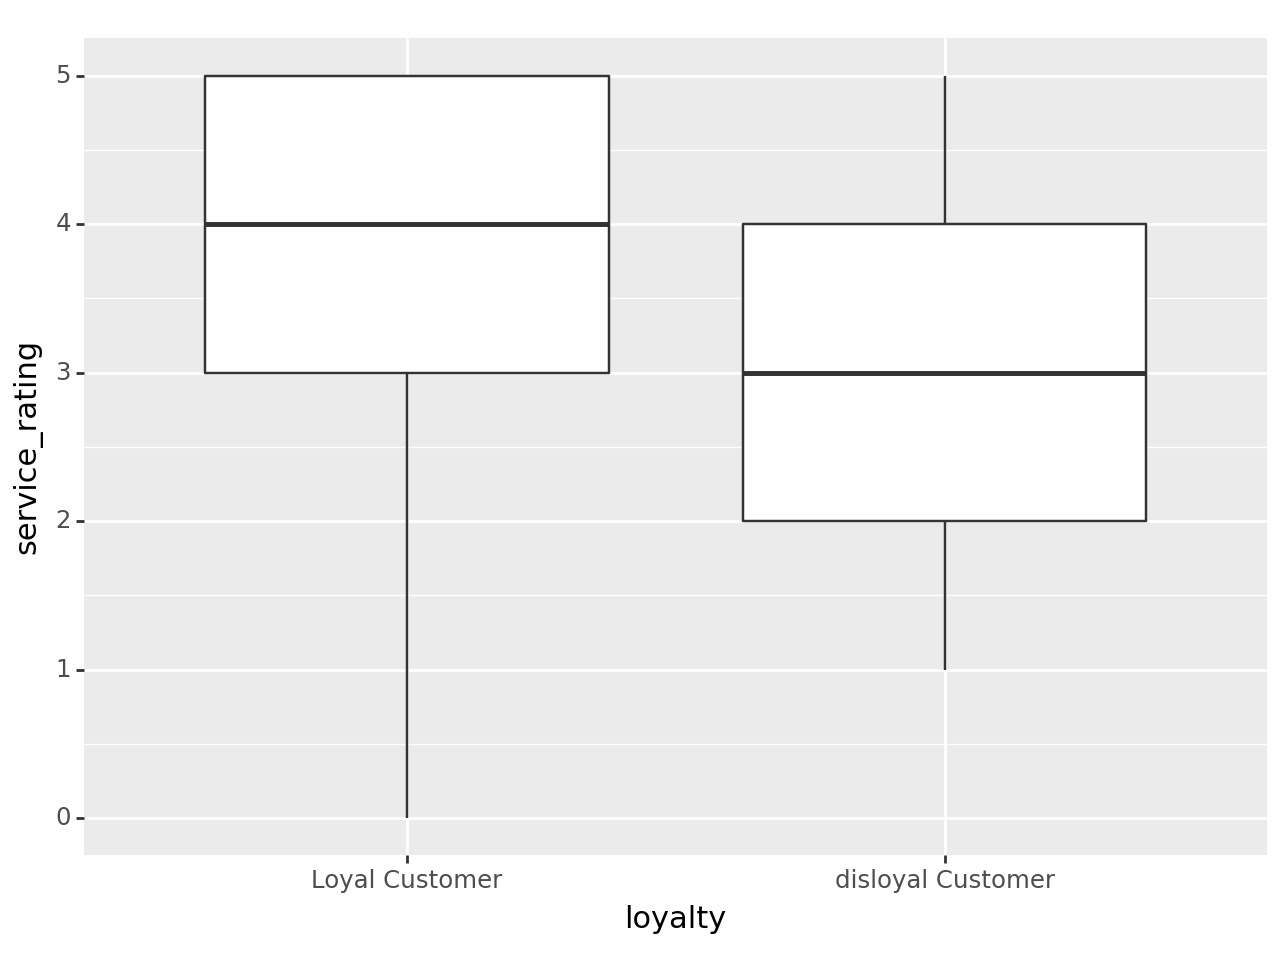

<Figure Size: (640 x 480)>

In [14]:
(
    ggplot(csat_data_subset, aes(x = 'loyalty', y = 'service_rating'))
      + geom_boxplot()
)

When we talk about the coefficient of a dummy variable, we are essentially looking at the impact or effect of a specific category or condition on the dependent variable. In simple terms, it helps us understand how much the dependent variable (the one we're trying to predict or explain) changes when we go from one condition to another.

For example, let's say we're studying customer satisfaction with airlines, and we have a dummy variable for "loyalty program membership," which can take two values: 0 (not a member) and 1 (a member). The coefficient associated with this dummy variable tells us how much customer satisfaction is expected to change when a passenger goes from not being a loyalty program member (0) to becoming one (1).

If the coefficient is positive, it means that being a loyalty program member tends to increase customer satisfaction. If it's negative, it suggests that membership might actually lower satisfaction. The magnitude (size) of the coefficient tells us how substantial this effect is. For instance, a large positive coefficient indicates a strong positive impact, while a small positive coefficient means a relatively minor influence.

In [16]:
from statsmodels.formula.api import ols

regression_model = ols(formula = 'service_rating ~ loyalty_dummy + age',
                       data = csat_data_subset).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         service_rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     606.7
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          5.24e-263
Time:                        19:26:12   Log-Likelihood:            -2.1482e+05
No. Observations:              129880   AIC:                         4.296e+05
Df Residuals:                  129877   BIC:                         4.297e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.1180      0.011    283.103

**Interpretation:**

1. when 'loyalty_dummy' changes from 0 to 1 (indicating loyalty), the expected value of satisfaction rating increases by 0.2807 on average.

2. For age?

In [17]:
regression_model = ols(formula = 'service_rating ~ loyalty_dummy + male_dummy + age',
                       data = csat_data_subset).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         service_rating   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     562.6
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:26:39   Log-Likelihood:            -2.1458e+05
No. Observations:              129880   AIC:                         4.292e+05
Df Residuals:                  129876   BIC:                         4.292e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.1879      0.011    278.257

**Interpretation**:

1. When 'loyalty_dummy' changes from 0 to 1 (indicating loyalty), the expected value of satisfaction rating increases by 0.2868 on average.
2. 'male_dummy' changes from 0 to 1 (indicating male gender), the expected value of satisfaction rating decreases by 0.1520 on average.

In [19]:
regression_model = ols(formula = 'service_rating ~ loyalty_dummy + male_dummy + C(travel_class) + age',
                       data = csat_data_subset).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         service_rating   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1071.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:26:53   Log-Likelihood:            -2.1280e+05
No. Observations:              129880   AIC:                         4.256e+05
Df Residuals:                  129874   BIC:                         4.257e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

**Interpret:**
1. 'C(travel_class)[T.Eco]' has a coefficient of -0.4029. This means that average service rating on average reduces by -0.4029 units if consumers fly in 'Eco' travel class **in comparison to the reference category.**
2. 'C(travel_class)[T.Eco Plus]' has a coefficient of -0.5414. This means that average service rating on average reduces by 0.5414 units if consumers fly in 'Eco plus' travel class in comparison to the reference category.

What is the reference class?

In [22]:
list(csat_data_subset.travel_class.unique())

['Eco', 'Business', 'Eco Plus']

### Interpreting interaction between variables

Interacting variables in a regression analysis is a statistical technique used when we want to explore whether the impact of one independent variable on the dependent variable is dependent on the value of another independent variable.

Three different types:
- between continuous variables
- between categorical variables
- between continuous and categorical variables.

Impact of TV ad on sales may depend on the changes in radio ad. TV and radio advertising often serve as complementary forms of promotion. When both are used together, they can reinforce each other's messages and reach different segments of the audience.

In [42]:
regression_model = ols(formula = 'sales ~ tv_ad * radio_ad',
                       data = sales_data).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          6.68e-146
Time:                        15:47:36   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.7502      0.248     27.

**Interpretation:**  Increasing both 'tv_ad' and 'radio_ad' leads to a increase of 0.0011 units on average in sales.


The impact of gender on service rating may depend on the the age of the consumer. Different age groups may have grown up in different societal contexts and eras, leading to variations in attitudes, expectations, and behaviors.

In [45]:
regression_model = ols(formula = 'service_rating ~ loyalty_dummy + male_dummy * age',
                       data = csat_data_subset).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         service_rating   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     423.2
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:49:27   Log-Likelihood:            -2.1458e+05
No. Observations:              129880   AIC:                         4.292e+05
Df Residuals:                  129875   BIC:                         4.292e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1680      0.015    218.

**Interpretation:** the negative coefficient (-0.0010) suggests that the effect of being male (as indicated by 'male_dummy') on the dependent variable diminishes with increasing age. In other words, the negative impact of male gender on the dependent variable becomes smaller (by -0.0010 on average) as individuals get older.

In [46]:
regression_model = ols(formula = 'service_rating ~ loyalty_dummy * male_dummy + age',
                       data = csat_data_subset).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         service_rating   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     476.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:49:50   Log-Likelihood:            -2.1447e+05
No. Observations:              129880   AIC:                         4.290e+05
Df Residuals:                  129875   BIC:                         4.290e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Interpretation:** Effect of 'loyalty_dummy' on the dependent variable is reduced when 'male_dummy' is equal to 1 (indicating male gender) compared to when 'male_dummy' is 0 (indicating female gender). This interaction term implies that the relationship between loyalty and the dependent variable differs between genders, with a stronger positive effect for females (as suggested by the positive 'loyalty_dummy' coefficient) and a weaker effect for males.

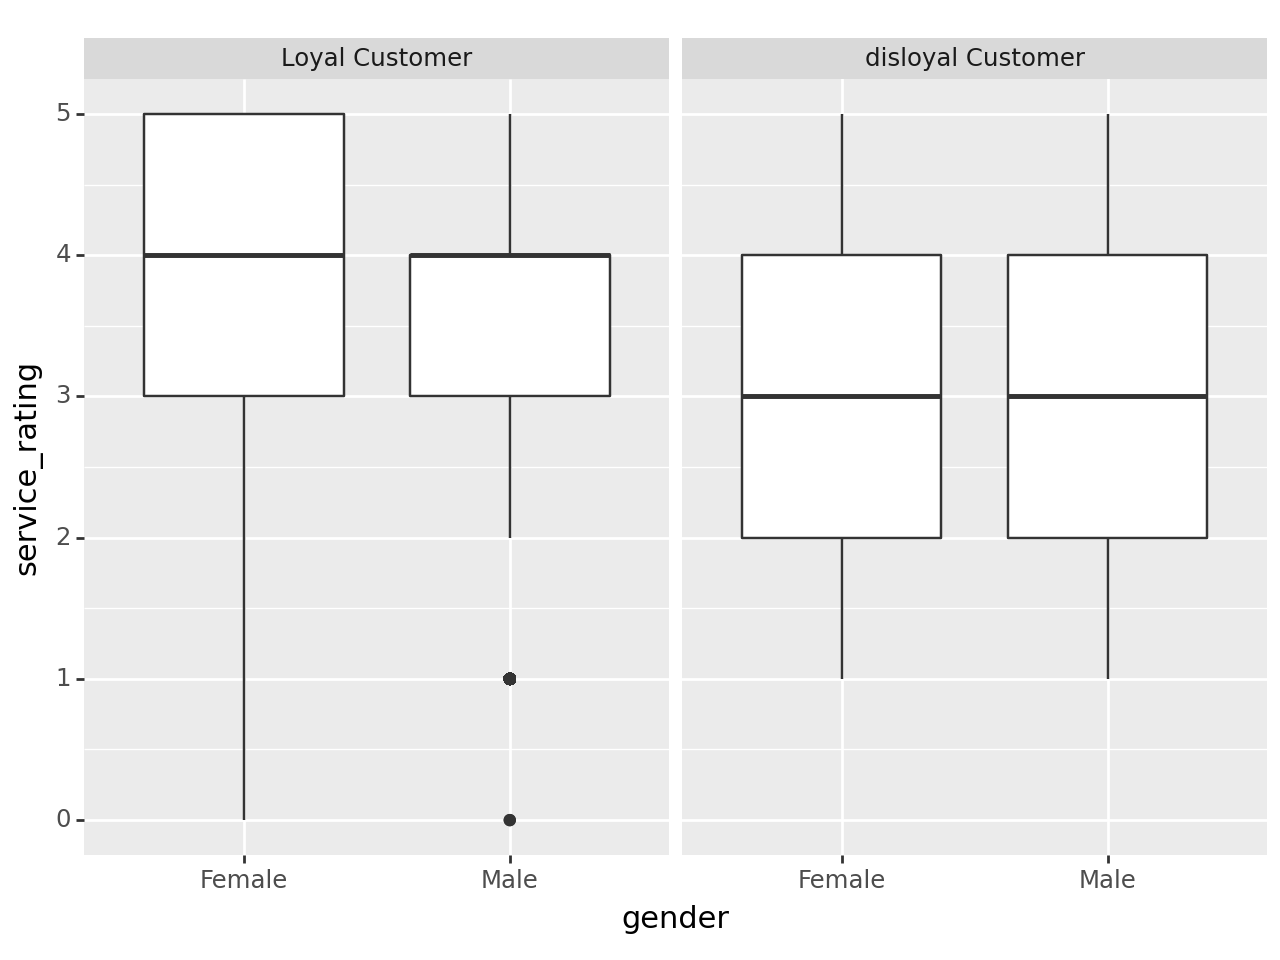

<Figure Size: (640 x 480)>

In [26]:
(
    ggplot(csat_data_subset, aes(x = 'gender', y = 'service_rating'))
      + geom_boxplot()
      + facet_wrap('loyalty')
)

# Extensions of linear regressions

## Logistic regression

In linear regression, you'd typically try to draw a straight line that best fits the data points. But when you have just two possible outcomes, a straight line doesn't make sense. It's like trying to fit a straight line through points that can only be at the top or bottom; it won't work well.

For example, instead of assuming service rating to be continous we can assume it to be binary - satisfied if rating greater than 3 else not satisfied



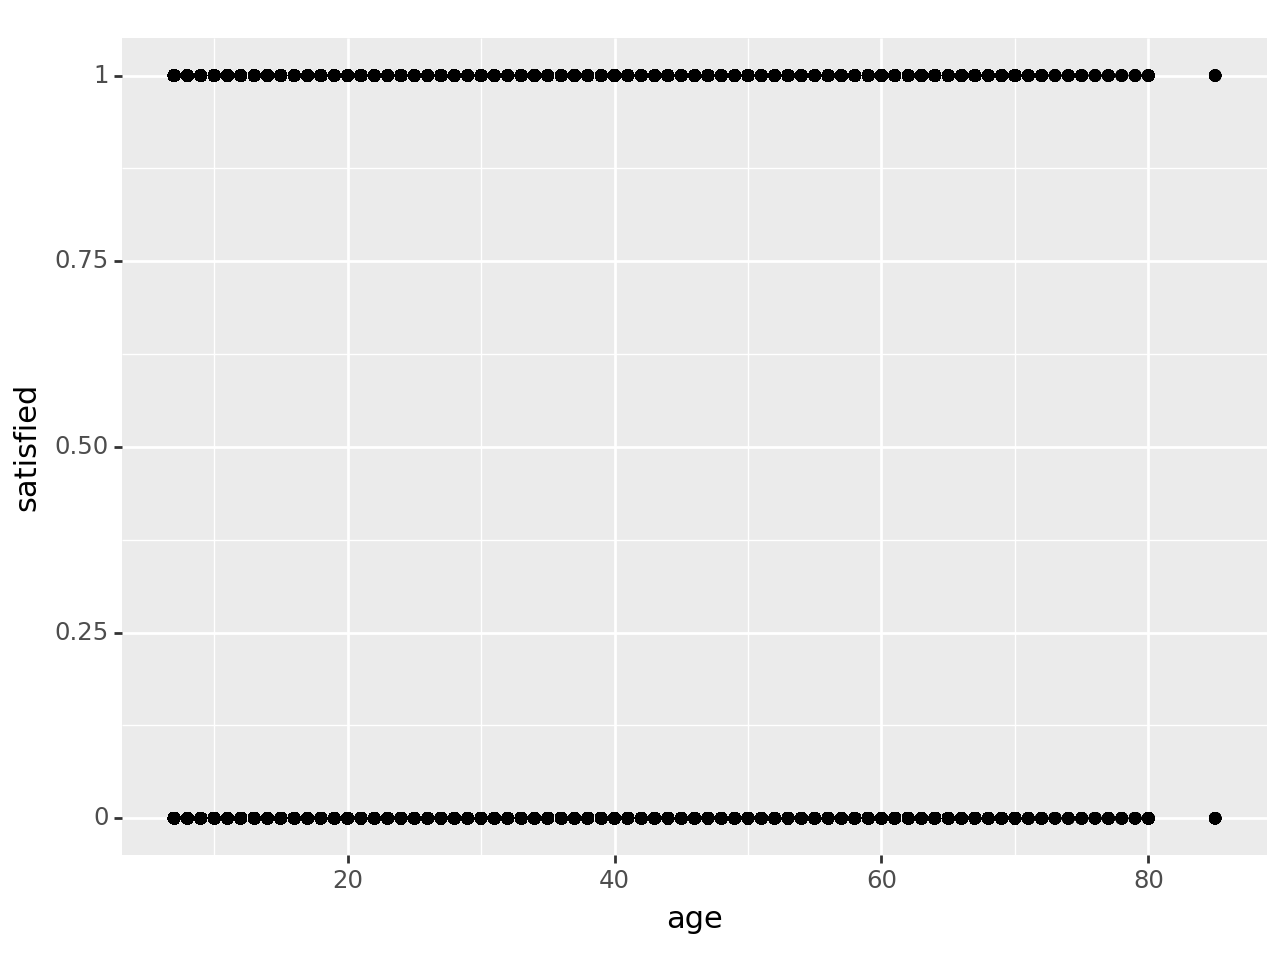

<Figure Size: (640 x 480)>

In [43]:
csat_data_subset_logistic = (
    csat_data.loc[:,["Customer Type","Age","Gender","Type of Travel","Class","On-board service"]]
    .rename(columns = {"Customer Type":"loyalty","Gender":'gender',"Age":"age",
             "Type of Travel":'travel_type',"Class":'travel_class',
             "On-board service": 'service_rating'})
    .assign(loyalty_dummy = lambda d: np.where(d.loyalty == "Loyal Customer",1,0),
            male_dummy = lambda d: np.where(d.gender == "Male",1,0),
            satisfied = lambda d: np.where(d.service_rating > 3,1,0))
)

(
    ggplot(csat_data_subset_logistic, aes(y = 'satisfied', x = 'age'))
      + geom_point()
)

So, to make inference when you have binary outcomes, you use different tools. One of the main tools is called "Logistic Regression.Instead of a straight line, it uses a curve to capture how different factors affect the probability of one of the two outcomes happening. It's like bending the line to fit the binary nature of the data.

In [44]:
from statsmodels.formula.api import logit

lregression_model = logit(formula = 'satisfied ~ loyalty_dummy * male_dummy + age',
                         data = csat_data_subset_logistic).fit()

print(lregression_model.summary())

Optimization terminated successfully.
         Current function value: 0.678011
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              satisfied   No. Observations:               129880
Model:                          Logit   Df Residuals:                   129875
Method:                           MLE   Df Model:                            4
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                 0.01242
Time:                        20:28:51   Log-Likelihood:                -88060.
converged:                       True   LL-Null:                       -89167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4286      0.021    -20.064      0.000      -0.470

**Interpretion:**

1. 'loyalty_dummy' (0.6192): This coefficient represents the change in the log-odds of the binary outcome for a one-unit increase in 'loyalty_dummy' while holding 'male_dummy' and 'age' constant. A positive coefficient suggests that an increase in 'loyalty_dummy' is associated with an increase in the log-odds of the outcome.
2. 'male_dummy' (0.0869): This coefficient represents the change in the log-odds of the binary outcome for a one-unit increase in 'male_dummy' while holding 'loyalty_dummy' and 'age' constant. A positive coefficient suggests that being male is associated with an increase in the log-odds of the outcome.
3. Interaction Term 'loyalty_dummy:male_dummy' (-0.4168): This coefficient represents the change in the log-odds of the binary outcome associated with the interaction between 'loyalty_dummy' and 'male_dummy.' A negative coefficient suggests that the interaction between 'loyalty_dummy' and 'male_dummy' is associated with a decrease in the log-odds of the outcome.
4. 'age' (0.0072): This coefficient represents the change in the log-odds of the binary outcome for a one-unit increase in 'age' while holding 'loyalty_dummy,' 'male_dummy,' and other variables constant. A positive coefficient suggests that as 'age' increases, the log-odds of the outcome also increase.

In [58]:
summary = lregression_model.summary2()
coef = summary.tables[1]['Coef.'].to_list()
odds_ratios = np.exp(coef)
print(odds_ratios)